In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
#let import the dataset
filepath = r"C:\Users\DELL\OneDrive\Documents\Loan_default.csv\Loan_default.csv"
df = pd.read_csv(filepath)

In [3]:
df.head(10)

,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,I38PQUQS96,56,85994,50587,520,80,4,15.23,36,0.44,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes,0
1,HPSK72WA7R,69,50432,124440,458,15,1,4.81,60,0.68,Master's,Full-time,Married,No,No,Other,Yes,0
2,C1OZ6DPJ8Y,46,84208,129188,451,26,3,21.17,24,0.31,Master's,Unemployed,Divorced,Yes,Yes,Auto,No,1
3,V2KKSFM3UN,32,31713,44799,743,0,3,7.07,24,0.23,High School,Full-time,Married,No,No,Business,No,0
4,EY08JDHTZP,60,20437,9139,633,8,4,6.51,48,0.73,Bachelor's,Unemployed,Divorced,No,Yes,Auto,No,0
5,A9S62RQ7US,25,90298,90448,720,18,2,22.72,24,0.10,High School,Unemployed,Single,Yes,No,Business,Yes,1
6,H8GXPAOS71,38,111188,177025,429,80,1,19.11,12,0.16,Bachelor's,Unemployed,Single,Yes,No,Home,Yes,0
7,0HGZQKJ36W,56,126802,155511,531,67,4,8.15,60,0.43,PhD,Full-time,Married,No,No,Home,Yes,0
8,1R0N3LGNRJ,36,42053,92357,827,83,1,23.94,48,0.20,Bachelor's,Self-employed,Divorced,Yes,No,Education,No,1
9,CM9L1GTT2P,40,132784,228510,480,114,4,9.09,48,0.33,High School,Self-employed,Married,Yes,No,Other,Yes,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255347 entries, 0 to 255346
Data columns (total 18 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   LoanID          255347 non-null  object 
 1   Age             255347 non-null  int64  
 2   Income          255347 non-null  int64  
 3   LoanAmount      255347 non-null  int64  
 4   CreditScore     255347 non-null  int64  
 5   MonthsEmployed  255347 non-null  int64  
 6   NumCreditLines  255347 non-null  int64  
 7   InterestRate    255347 non-null  float64
 8   LoanTerm        255347 non-null  int64  
 9   DTIRatio        255347 non-null  float64
 10  Education       255347 non-null  object 
 11  EmploymentType  255347 non-null  object 
 12  MaritalStatus   255347 non-null  object 
 13  HasMortgage     255347 non-null  object 
 14  HasDependents   255347 non-null  object 
 15  LoanPurpose     255347 non-null  object 
 16  HasCoSigner     255347 non-null  object 
 17  Default   

In [5]:
df.shape

(255347, 18)

In [6]:
df.isnull().sum()

LoanID            0
Age               0
Income            0
LoanAmount        0
CreditScore       0
MonthsEmployed    0
NumCreditLines    0
InterestRate      0
LoanTerm          0
DTIRatio          0
Education         0
EmploymentType    0
MaritalStatus     0
HasMortgage       0
HasDependents     0
LoanPurpose       0
HasCoSigner       0
Default           0
dtype: int64

In [7]:
#inspecting the column
df.columns

Index(['LoanID', 'Age', 'Income', 'LoanAmount', 'CreditScore',
       'MonthsEmployed', 'NumCreditLines', 'InterestRate', 'LoanTerm',
       'DTIRatio', 'Education', 'EmploymentType', 'MaritalStatus',
       'HasMortgage', 'HasDependents', 'LoanPurpose', 'HasCoSigner',
       'Default'],
      dtype='object')

#### Checking for Outlier

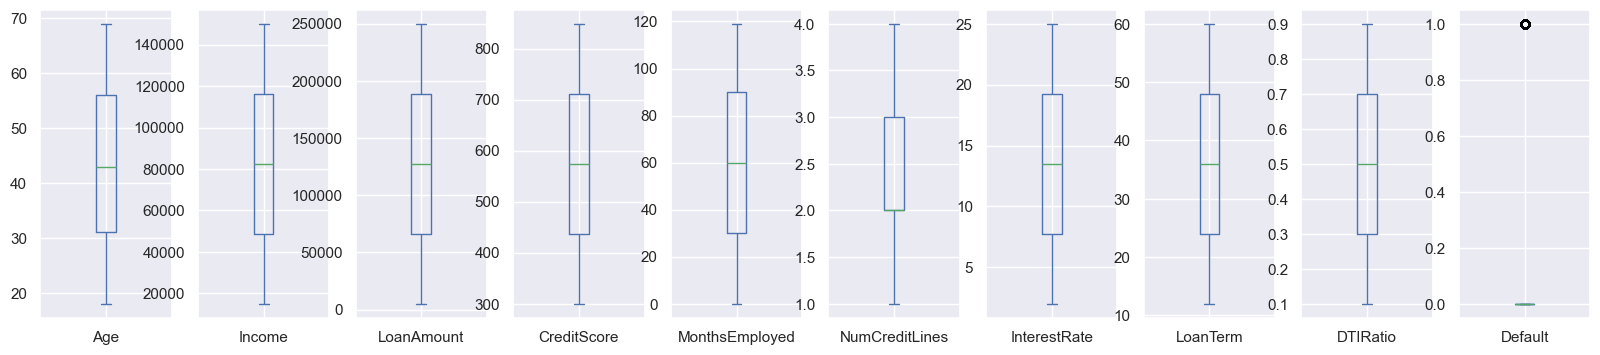

In [8]:
#let check for outlier

Num = ['Age', 'Income', 'LoanAmount', 'CreditScore',
       'MonthsEmployed', 'NumCreditLines', 'InterestRate', 'LoanTerm',
       'DTIRatio','Default']

df[Num].plot(
    kind = 'box',
    figsize = (20, 4),
    subplots = True
);

In [9]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Age,255347.0,43.498306,14.990258,18.0,31.00,43.00,56.00,69.0
Income,255347.0,82499.304597,38963.013729,15000.0,48825.50,82466.00,116219.00,149999.0
LoanAmount,255347.0,127578.865512,70840.706142,5000.0,66156.00,127556.00,188985.00,249999.0
CreditScore,255347.0,574.264346,158.903867,300.0,437.00,574.00,712.00,849.0
MonthsEmployed,255347.0,59.541976,34.643376,0.0,30.00,60.00,90.00,119.0
NumCreditLines,255347.0,2.501036,1.117018,1.0,2.00,2.00,3.00,4.0
InterestRate,255347.0,13.492773,6.636443,2.0,7.77,13.46,19.25,25.0
LoanTerm,255347.0,36.025894,16.969330,12.0,24.00,36.00,48.00,60.0
DTIRatio,255347.0,0.500212,0.230917,0.1,0.30,0.50,0.70,0.9
Default,255347.0,0.116128,0.320379,0.0,0.00,0.00,0.00,1.0


#### From the above data i notice there is no missing value
#### Just 1 Outlier in the Default column which i know will not affect my model 
#### The data is clean and we can proceed to analysis 

### Classification Of Age for Analysis Purpose

In [10]:
def age_convert(Age):
    ageCategory=[]
    for i in Age:
        if i <= 30:
            ageCategory.append('Age 18-30')
        elif i <= 40:
            ageCategory.append('Age 31-40')
        elif i <= 50:
            ageCategory.append('Age 41-50')
        elif i <= 60:
            ageCategory.append('Age 51-60')
        else:
            ageCategory.append('Above 60')
            
    return ageCategory

In [11]:
df['Age_Category']=age_convert(df['Age'])

In [12]:
df.head(12)

,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default,Age_Category
0,I38PQUQS96,56,85994,50587,520,80,4,15.23,36,0.44,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes,0,Age 51-60
1,HPSK72WA7R,69,50432,124440,458,15,1,4.81,60,0.68,Master's,Full-time,Married,No,No,Other,Yes,0,Above 60
2,C1OZ6DPJ8Y,46,84208,129188,451,26,3,21.17,24,0.31,Master's,Unemployed,Divorced,Yes,Yes,Auto,No,1,Age 41-50
3,V2KKSFM3UN,32,31713,44799,743,0,3,7.07,24,0.23,High School,Full-time,Married,No,No,Business,No,0,Age 31-40
4,EY08JDHTZP,60,20437,9139,633,8,4,6.51,48,0.73,Bachelor's,Unemployed,Divorced,No,Yes,Auto,No,0,Age 51-60
5,A9S62RQ7US,25,90298,90448,720,18,2,22.72,24,0.10,High School,Unemployed,Single,Yes,No,Business,Yes,1,Age 18-30
6,H8GXPAOS71,38,111188,177025,429,80,1,19.11,12,0.16,Bachelor's,Unemployed,Single,Yes,No,Home,Yes,0,Age 31-40
7,0HGZQKJ36W,56,126802,155511,531,67,4,8.15,60,0.43,PhD,Full-time,Married,No,No,Home,Yes,0,Age 51-60
8,1R0N3LGNRJ,36,42053,92357,827,83,1,23.94,48,0.20,Bachelor's,Self-employed,Divorced,Yes,No,Education,No,1,Age 31-40
9,CM9L1GTT2P,40,132784,228510,480,114,4,9.09,48,0.33,High School,Self-employed,Married,Yes,No,Other,Yes,0,Age 31-40


## Let conduct some analysis with the categorical data with respect to Default

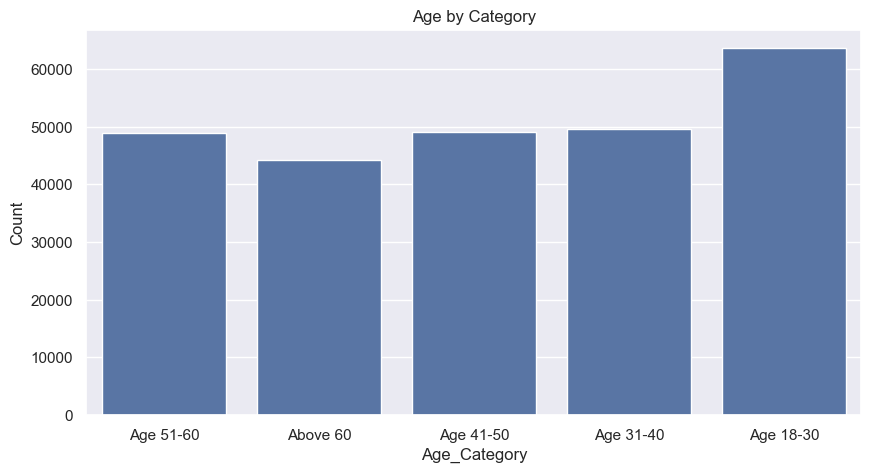

In [13]:
plt.figure(
    figsize=(10,5)
)
sns.countplot(data = df, x = 'Age_Category')
plt.xlabel('Age_Category')
plt.ylabel('Count')
plt.title('Age by Category');

### Age_Category by Default

Age_Category
Age 18-30    63577
Age 31-40    49593
Age 41-50    49003
Age 51-60    48972
Above 60     44202
Name: count, dtype: int64

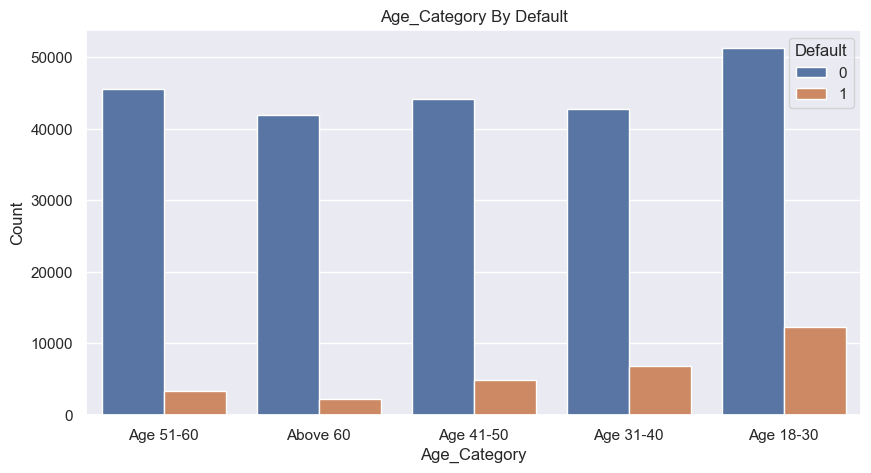

In [14]:
plt.figure(
    figsize=(10,5)
)
sns.countplot(data = df, x = 'Age_Category', hue = 'Default')
plt.xlabel('Age_Category')
plt.ylabel('Count')
plt.title('Age_Category By Default')

df['Age_Category'].value_counts()

### Education Category by Default

Education
Bachelor's     64366
High School    63903
Master's       63541
PhD            63537
Name: count, dtype: int64

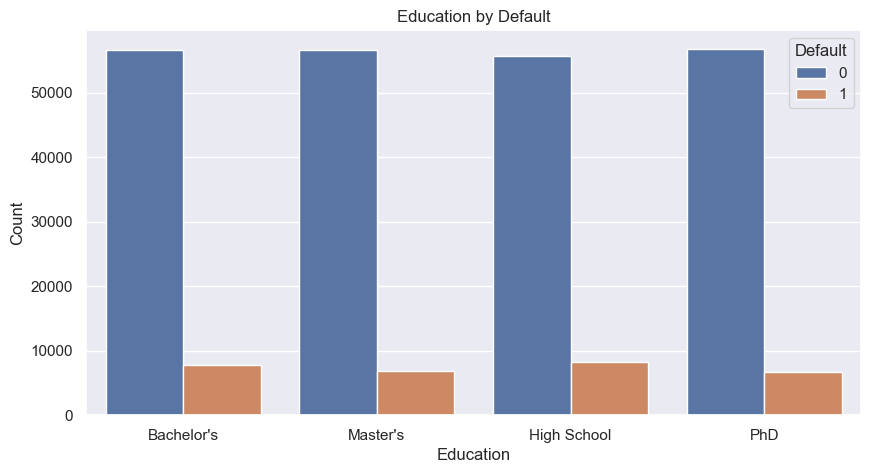

In [15]:

plt.figure(
    figsize=(10,5)
)
sns.countplot(data = df, x = 'Education', hue = 'Default')
plt.xlabel('Education')
plt.ylabel('Count')
plt.title('Education by Default')

df['Education'].value_counts()

### Marital Status By Default

MaritalStatus
Married     85302
Divorced    85033
Single      85012
Name: count, dtype: int64

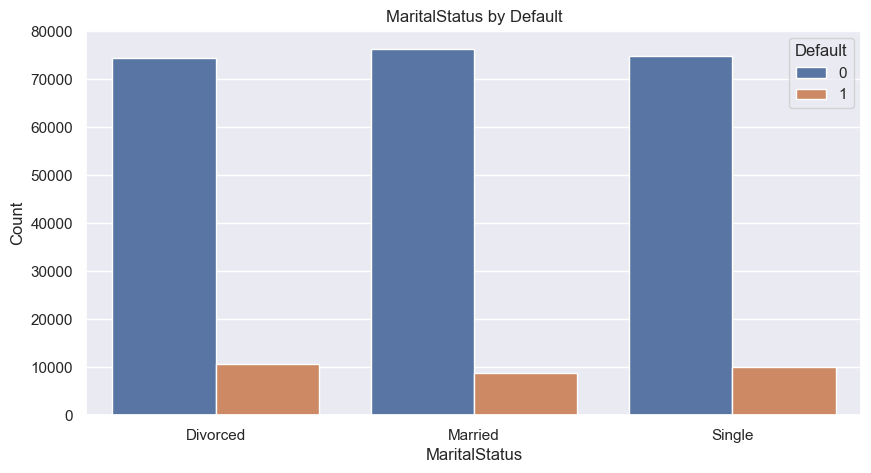

In [16]:
plt.figure(
    figsize=(10,5)
)
sns.countplot(data = df, x = 'MaritalStatus', hue = 'Default')
plt.xlabel('MaritalStatus')
plt.ylabel('Count')
plt.title('MaritalStatus by Default')

df['MaritalStatus'].value_counts()

### Employment Type By Default

EmploymentType
Part-time        64161
Unemployed       63824
Self-employed    63706
Full-time        63656
Name: count, dtype: int64

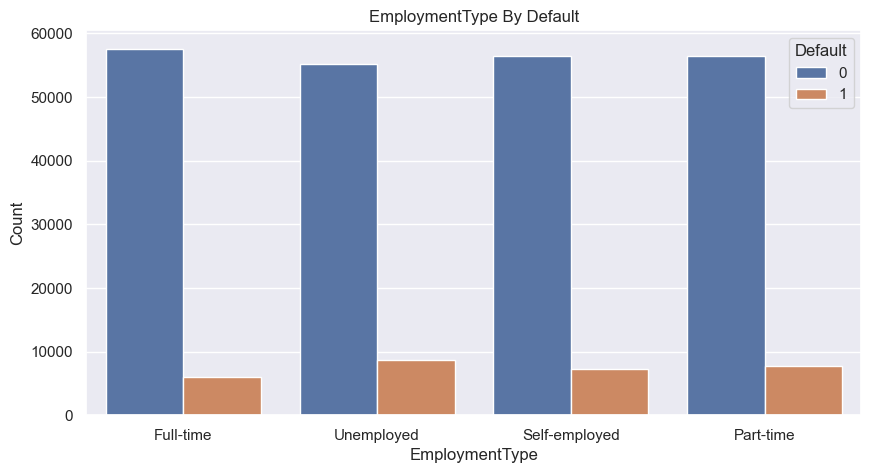

In [17]:
plt.figure(
    figsize=(10,5)
)
sns.countplot(data = df, x = 'EmploymentType', hue = 'Default')
plt.xlabel('EmploymentType')
plt.ylabel('Count')
plt.title('EmploymentType By Default')

df['EmploymentType'].value_counts()

### Those that Has Mortgage By Default

HasMortgage
Yes    127677
No     127670
Name: count, dtype: int64

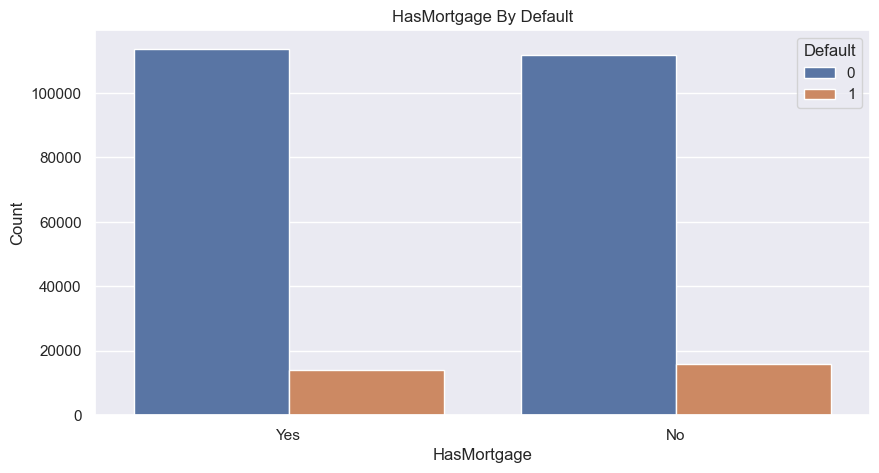

In [18]:
plt.figure(
    figsize=(10,5)
)
sns.countplot(data = df, x = 'HasMortgage', hue = 'Default')
plt.xlabel('HasMortgage')
plt.ylabel('Count')
plt.title('HasMortgage By Default')

df['HasMortgage'].value_counts()

### Those that Has Dependents By Default

HasDependents
Yes    127742
No     127605
Name: count, dtype: int64

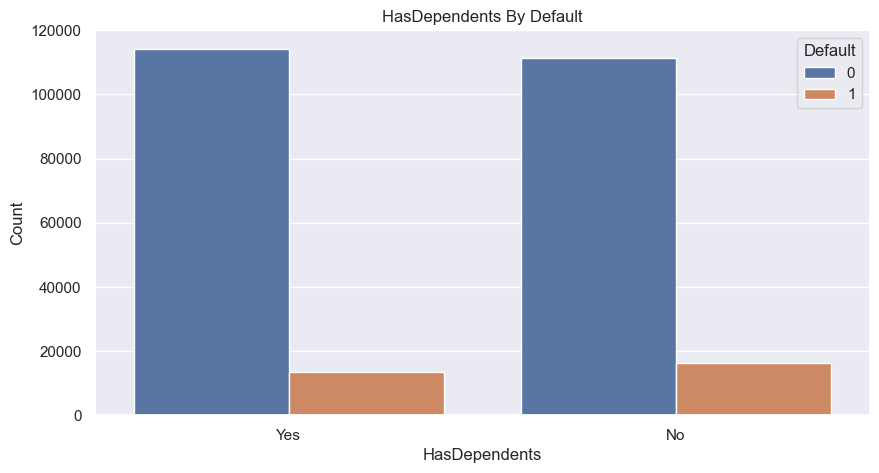

In [19]:
plt.figure(
    figsize=(10,5)
)
sns.countplot(data = df, x = 'HasDependents', hue = 'Default')
plt.xlabel('HasDependents')
plt.ylabel('Count')
plt.title('HasDependents By Default')

df['HasDependents'].value_counts()

### Purpose of Loan By Default

LoanPurpose
Business     51298
Home         51286
Education    51005
Other        50914
Auto         50844
Name: count, dtype: int64

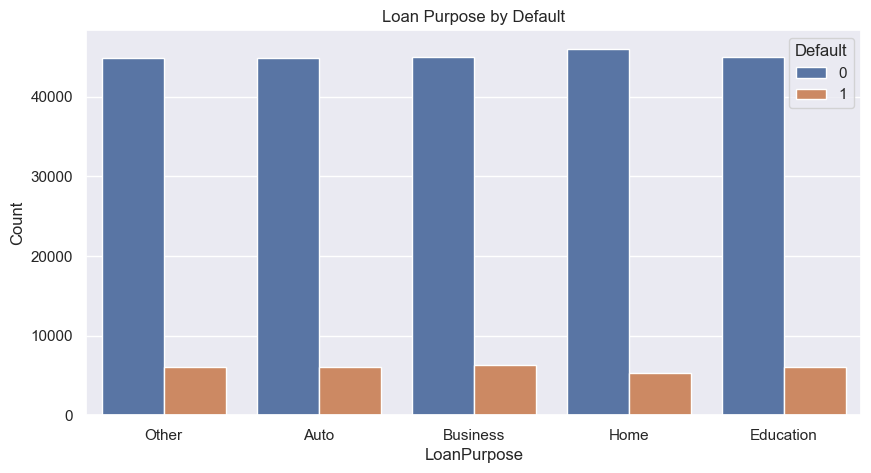

In [20]:
plt.figure(
    figsize=(10,5)
)
sns.countplot(data = df, x = 'LoanPurpose', hue = 'Default')
plt.xlabel('LoanPurpose')
plt.ylabel('Count')
plt.title('Loan Purpose by Default')

df['LoanPurpose'].value_counts()

### Those that Has Cosigner By Default

HasCoSigner
Yes    127701
No     127646
Name: count, dtype: int64

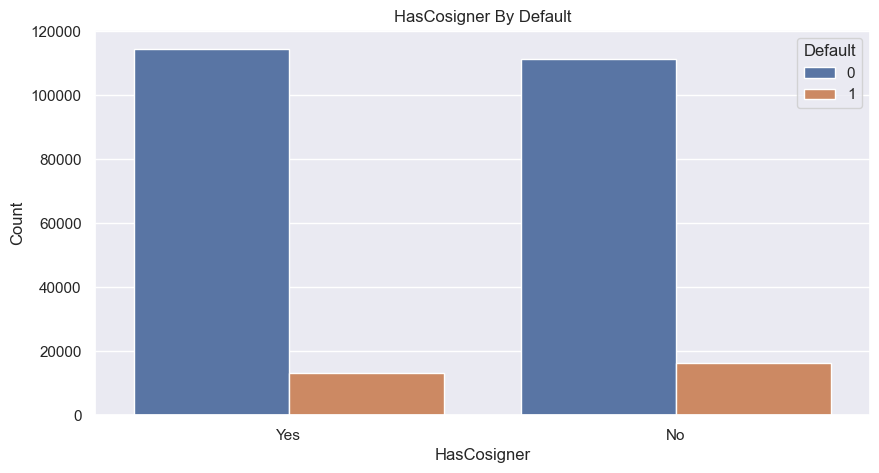

In [21]:
plt.figure(
    figsize=(10,5)
)
sns.countplot(data = df, x = 'HasCoSigner', hue = 'Default')
plt.xlabel('HasCosigner')
plt.ylabel('Count')
plt.title('HasCosigner By Default')

df['HasCoSigner'].value_counts()

## Data Preprocessing

#### Encoding of Categorical/Binary Data

In [22]:
df.columns

Index(['LoanID', 'Age', 'Income', 'LoanAmount', 'CreditScore',
       'MonthsEmployed', 'NumCreditLines', 'InterestRate', 'LoanTerm',
       'DTIRatio', 'Education', 'EmploymentType', 'MaritalStatus',
       'HasMortgage', 'HasDependents', 'LoanPurpose', 'HasCoSigner', 'Default',
       'Age_Category'],
      dtype='object')

In [23]:
# I have to drop colunm not needed for my model
df.drop(['LoanID', 'Age_Category'], axis=1, inplace=True)

In [24]:
df.head()

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,56,85994,50587,520,80,4,15.23,36,0.44,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes,0
1,69,50432,124440,458,15,1,4.81,60,0.68,Master's,Full-time,Married,No,No,Other,Yes,0
2,46,84208,129188,451,26,3,21.17,24,0.31,Master's,Unemployed,Divorced,Yes,Yes,Auto,No,1
3,32,31713,44799,743,0,3,7.07,24,0.23,High School,Full-time,Married,No,No,Business,No,0
4,60,20437,9139,633,8,4,6.51,48,0.73,Bachelor's,Unemployed,Divorced,No,Yes,Auto,No,0


In [25]:
# encoding Binary Data map
df['HasMortgage'] = df['HasMortgage'].map({'Yes': 1, 'No': 0})
df['HasDependents'] = df['HasDependents'].map({'Yes': 1, 'No': 0})
df['HasCoSigner'] = df['HasCoSigner'].map({'Yes': 1, 'No': 0})

In [26]:
from sklearn.preprocessing import LabelEncoder

In [27]:
label_encoder = LabelEncoder()
df['Education'] = label_encoder.fit_transform(df['Education'])
df['EmploymentType'] = label_encoder.fit_transform(df['EmploymentType'])
df['MaritalStatus'] = label_encoder.fit_transform(df['MaritalStatus'])
df['LoanPurpose'] = label_encoder.fit_transform(df['LoanPurpose'])

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255347 entries, 0 to 255346
Data columns (total 17 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Age             255347 non-null  int64  
 1   Income          255347 non-null  int64  
 2   LoanAmount      255347 non-null  int64  
 3   CreditScore     255347 non-null  int64  
 4   MonthsEmployed  255347 non-null  int64  
 5   NumCreditLines  255347 non-null  int64  
 6   InterestRate    255347 non-null  float64
 7   LoanTerm        255347 non-null  int64  
 8   DTIRatio        255347 non-null  float64
 9   Education       255347 non-null  int32  
 10  EmploymentType  255347 non-null  int32  
 11  MaritalStatus   255347 non-null  int32  
 12  HasMortgage     255347 non-null  int64  
 13  HasDependents   255347 non-null  int64  
 14  LoanPurpose     255347 non-null  int32  
 15  HasCoSigner     255347 non-null  int64  
 16  Default         255347 non-null  int64  
dtypes: float64

In [29]:
df.head()

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,56,85994,50587,520,80,4,15.23,36,0.44,0,0,0,1,1,4,1,0
1,69,50432,124440,458,15,1,4.81,60,0.68,2,0,1,0,0,4,1,0
2,46,84208,129188,451,26,3,21.17,24,0.31,2,3,0,1,1,0,0,1
3,32,31713,44799,743,0,3,7.07,24,0.23,1,0,1,0,0,1,0,0
4,60,20437,9139,633,8,4,6.51,48,0.73,0,3,0,0,1,0,0,0


In [30]:
X = df.drop('Default', axis = 1,)
y = df["Default"]

In [31]:
X.head(15)

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner
0,56,85994,50587,520,80,4,15.23,36,0.44,0,0,0,1,1,4,1
1,69,50432,124440,458,15,1,4.81,60,0.68,2,0,1,0,0,4,1
2,46,84208,129188,451,26,3,21.17,24,0.31,2,3,0,1,1,0,0
3,32,31713,44799,743,0,3,7.07,24,0.23,1,0,1,0,0,1,0
4,60,20437,9139,633,8,4,6.51,48,0.73,0,3,0,0,1,0,0
5,25,90298,90448,720,18,2,22.72,24,0.10,1,3,2,1,0,1,1
6,38,111188,177025,429,80,1,19.11,12,0.16,0,3,2,1,0,3,1
7,56,126802,155511,531,67,4,8.15,60,0.43,3,0,1,0,0,3,1
8,36,42053,92357,827,83,1,23.94,48,0.20,0,2,0,1,0,2,0
9,40,132784,228510,480,114,4,9.09,48,0.33,1,2,1,1,0,4,1


##### we have successful split our data into features and target (X,y)

In [32]:
y.head()

0    0
1    0
2    1
3    0
4    0
Name: Default, dtype: int64

In [33]:
y.value_counts()

Default
0    225694
1     29653
Name: count, dtype: int64

In [34]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255347 entries, 0 to 255346
Data columns (total 16 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Age             255347 non-null  int64  
 1   Income          255347 non-null  int64  
 2   LoanAmount      255347 non-null  int64  
 3   CreditScore     255347 non-null  int64  
 4   MonthsEmployed  255347 non-null  int64  
 5   NumCreditLines  255347 non-null  int64  
 6   InterestRate    255347 non-null  float64
 7   LoanTerm        255347 non-null  int64  
 8   DTIRatio        255347 non-null  float64
 9   Education       255347 non-null  int32  
 10  EmploymentType  255347 non-null  int32  
 11  MaritalStatus   255347 non-null  int32  
 12  HasMortgage     255347 non-null  int64  
 13  HasDependents   255347 non-null  int64  
 14  LoanPurpose     255347 non-null  int32  
 15  HasCoSigner     255347 non-null  int64  
dtypes: float64(2), int32(4), int64(10)
memory usage: 27.3 MB

<Axes: xlabel='Default'>

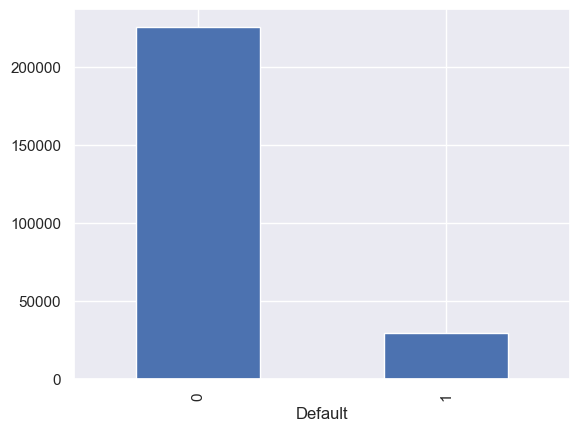

In [35]:
# let check if our label is balance 
y.value_counts().plot(kind='bar')

In [36]:
#let use overstampling to balance the target data
from imblearn.under_sampling import RandomUnderSampler 
from imblearn.combine import SMOTETomek 

In [37]:
smt = SMOTETomek(random_state=42)

In [38]:
#rus = RandomUnderSampler(random_state=42, replacement=True)

In [39]:
#X_train_res, y_train_res = rus.fit_resample(X_train, y_train)

In [40]:
#y_train_res.value_counts()

In [41]:
#y_train_res.value_counts().plot(kind='bar')

#### Let prepare our data for modelling
###### let split our data into Train and Test

In [42]:
from sklearn.model_selection import train_test_split

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [44]:
X_train_res, y_train_res = smt.fit_resample(X_train, y_train)

In [45]:
y_train_res.value_counts()

Default
1    145893
0    145893
Name: count, dtype: int64

<Axes: xlabel='Default'>

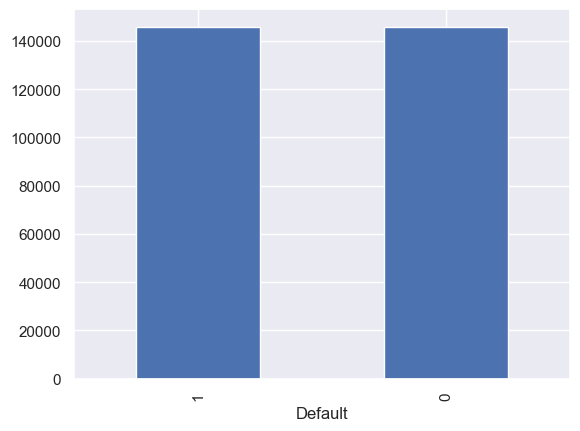

In [46]:
y_train_res.value_counts().plot(kind='bar')

In [47]:
print(X_train.shape)
print(X_train_res.shape)

(178742, 16)
(291786, 16)


In [48]:
print(y_train.shape)
print(y_train_res.shape)

(178742,)
(291786,)


In [49]:
#let scale our data
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [50]:
Scaler = MinMaxScaler()

In [51]:
#Scale = StandardScaler()

In [52]:
X_train_res= Scaler.fit_transform(X_train_res)

In [53]:
X_test= Scaler.transform(X_test)

#### Model Creation

##### RandomForestClassifier

In [54]:
#let import the library
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,precision_score,balanced_accuracy_score,average_precision_score,f1_score,recall_score
from sklearn.metrics import classification_report,confusion_matrix,ConfusionMatrixDisplay

In [55]:
rfc_model = RandomForestClassifier()

### RandomForestClassifier

In [56]:
rfc_model.fit(X_train_res, y_train_res)


RandomForestClassifier()

In [57]:
#y_pred = rfc_model.predict(X_test)

In [58]:
rfc_predict = rfc_model.predict(X_test)

In [59]:
rfc_predict

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [60]:
print(classification_report(y_test, rfc_predict, zero_division='warn'))

              precision    recall  f1-score   support

           0       0.90      0.91      0.91     67681
           1       0.26      0.24      0.25      8924

    accuracy                           0.83     76605
   macro avg       0.58      0.58      0.58     76605
weighted avg       0.83      0.83      0.83     76605



In [61]:
print(confusion_matrix(y_test,rfc_predict))

[[61539  6142]
 [ 6770  2154]]


In [62]:
accuracy = accuracy_score(y_test, rfc_predict)
bal_accuracy = balanced_accuracy_score(y_test, rfc_predict)
precision_score = average_precision_score(y_test, rfc_predict)
f1 = f1_score(y_test, rfc_predict)
Recall = recall_score(y_test, rfc_predict, average = 'macro')
print(f'The Accuracy is {accuracy:.3f}.')
print(f'The Bal_accuracy is {bal_accuracy:.3f}.')
print(f'The Precision_score is {precision_score:.3f}.')
print(f'The f1_score is {f1:.3f}.')
print(f'The Recall_score is {Recall:.3f}.')

The Accuracy is 0.831.
The Bal_accuracy is 0.575.
The Precision_score is 0.151.
The f1_score is 0.250.
The Recall_score is 0.575.


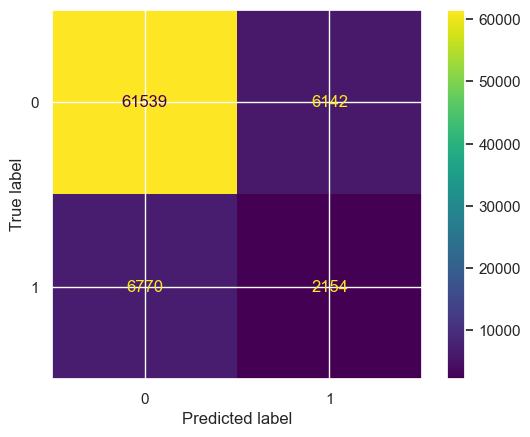

In [63]:
ConfusionMatrixDisplay.from_estimator(rfc_model,X_test,y_test);

In [64]:
from sklearn.ensemble import AdaBoostClassifier

In [65]:
Adb_model = AdaBoostClassifier()

In [66]:
Adb_model.fit(X_train_res, y_train_res)

AdaBoostClassifier()

In [67]:
Adb_predict = Adb_model.predict(X_test)

In [68]:
print(classification_report(y_test, Adb_predict, zero_division='warn'))

              precision    recall  f1-score   support

           0       0.91      0.84      0.87     67681
           1       0.22      0.35      0.27      8924

    accuracy                           0.78     76605
   macro avg       0.56      0.59      0.57     76605
weighted avg       0.83      0.78      0.80     76605



In [69]:
accuracy = accuracy_score(y_test, Adb_predict)
bal_accuracy = balanced_accuracy_score(y_test, Adb_predict)
precision_score = average_precision_score(y_test, Adb_predict)
f1 = f1_score(y_test, Adb_predict)
Recall = recall_score(y_test, Adb_predict, average = 'macro')
print(f'The Accuracy is {accuracy:.3f}.')
print(f'The Bal_accuracy is {bal_accuracy:.3f}.')
print(f'The Precision_score is {precision_score:.3f}.')
print(f'The f1_score is {f1:.3f}.')
print(f'The Recall_score is {Recall:.3f}.')

The Accuracy is 0.779.
The Bal_accuracy is 0.591.
The Precision_score is 0.152.
The f1_score is 0.267.
The Recall_score is 0.591.


In [70]:
import joblib

In [71]:
joblib.dump(Adb_model, "loan_models")

['loan_models']

In [72]:
loan_model = joblib.load("loan_models")

In [73]:
new_result = loan_model.predict(X_test)

In [74]:
new_result

array([0, 0, 0, ..., 0, 0, 1], dtype=int64)